In [4]:
import pandas as pd

In [2]:
def split_owner(owner_str):
    """
    Given an owner string like:
    - "Örsted [10%]; Felvig [90%]"  OR
    - "Owner1; Owner2" 
    returns a list of tuples (owner_name, fraction).
    
    If no percentages are provided for multiple owners, each is assigned an equal share.
    If some owners lack percentages while others have them, the remaining percentage is equally
    distributed among those missing percentages.
    """
    if not isinstance(owner_str, str):
        return [("Unknown", 1.0)]


    # Split the string by semicolon to handle multiple owners
    parts = [part.strip() for part in owner_str.split(';')]
    
    # Check if any part contains a percentage
    has_percentage = any('[' in part and ']' in part for part in parts)
    
    result = []
    
    if not has_percentage:
        # No percentages provided: assign equal share to each owner.
        equal_share = 1.0 / len(parts)
        for part in parts:
            # Clean the owner name in case any extraneous text exists
            name = part.split('[')[0].strip()
            result.append((name, equal_share))
    else:
        # Process each part: extract percentage if available.
        for part in parts:
            if '[' in part and ']' in part:
                name = part.split('[')[0].strip()
                percentage_str = part.split('[')[1].split(']')[0].strip().replace('%', '')
                try:
                    percentage = float(percentage_str) / 100.0
                except ValueError:
                    percentage = None
                result.append((name, percentage))
            else:
                # Part without a percentage: mark fraction as None for now.
                result.append((part, None))
        
        # For parts that are missing percentages, assign an equal share of the remaining capacity.
        total_assigned = sum(p for _, p in result if p is not None)
        missing_count = sum(1 for _, p in result if p is None)
        if missing_count > 0:
            remaining = max(0, 1.0 - total_assigned)  # Avoid negative
            missing_share = remaining / missing_count
            result = [(name, p if p is not None else missing_share) for name, p in result]
    
    return result

# Assume merged_bio is your DataFrame containing the "Owner" and "Capacity (MW)" columns.
# For example, if reading from CSV:
# merged_bio = pd.read_csv("Bioenergy_merged.csv")

# Create a new list to store expanded rows



In [5]:
df_over = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Bioenergy_overthresh.csv")
df_under = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Bioenergy_underthresh.csv")

# Concatenate the DataFrames vertically (row-wise)
Bio_df = pd.concat([df_over, df_under], ignore_index=True)
Active_bio_df = Bio_df[Bio_df['Status'] == 'operating']
Active_bio_df.rename(columns={'Owner(s)': 'Owner'}, inplace=True)


expanded_rows = []

for idx, row in Active_bio_df.iterrows():
    capacity = row["Capacity (MW)"]
    owner_str = row["Owner"]
    owners = split_owner(owner_str)
    for name, fraction in owners:
        new_row = row.copy()
        new_row["Owner"] = name  # Set the individual owner name
        # Calculate the attributed capacity. If fraction is None for some reason, use full capacity.
        new_row["Attributed Capacity (MW)"] = capacity * fraction if fraction is not None else capacity
        expanded_rows.append(new_row)

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Optionally, group by owner to get total attributed capacity per company
Bio_capacity_by_company = expanded_df.groupby("Owner")["Attributed Capacity (MW)"].sum().reset_index()

# Display the result
sum(Bio_capacity_by_company['Attributed Capacity (MW)'])

/Users/hn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


84316.87

In [86]:
Bio_capacity_by_company['']

,Owner(s),Attributed Capacity (MW)
0,A2A SpA,252.00
1,AEB Exploitatie BV,111.00
2,ALLETE Inc,73.00
3,AVA GmbH,76.00
4,AWEP Onahama,75.00
...,...,...
901,other,1689.16
902,swb AG,50.00
903,Öresundskraft AB,70.00
904,Övik Energi AB,40.00


In [293]:
Coal_df = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Coal.csv")
Active_Coal_df = Coal_df[Coal_df['Status'] == 'operating']


expanded_rows = []

for idx, row in Active_Coal_df.iterrows():
    capacity = row["Capacity (MW)"]
    owner_str = row["Parent"]
    owners = split_owner(owner_str)
    for name, fraction in owners:
        new_row = row.copy()
        new_row["Owner"] = name  # Set the individual owner name
        # Calculate the attributed capacity. If fraction is None for some reason, use full capacity.
        new_row["Attributed Capacity (MW)"] = capacity * fraction if fraction is not None else capacity
        expanded_rows.append(new_row)

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Optionally, group by owner to get total attributed capacity per company
Coal_capacity_by_company = expanded_df.groupby("Owner")["Attributed Capacity (MW)"].sum().reset_index()

# Display the result
sum(Coal_capacity_by_company['Attributed Capacity (MW)'])



2140264.5022000023

In [254]:
Coal_capacity_by_company.sort_values(by = "Attributed Capacity (MW)", ascending=False).iloc[]


,Owner,Attributed Capacity (MW)
705,Huaneng Power International Inc,75511.770
237,China Energy Investment Corp,60115.940
1048,NTPC Ltd,59395.000
273,China Shenhua Energy Co Ltd,49675.635
441,Eskom Holdings SOC Ltd,43731.800
...,...,...
1612,Talen Energy Corp,4686.600
888,Karnataka Power Corp Ltd,4666.400
712,Hubei Energy Group Co Ltd,4586.000
374,Dominion Energy Inc,4576.200


In [294]:
df_over = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Geothermal_overthresh.csv")
df_under = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Geothermal_underthres.csv")

# Concatenate the DataFrames vertically (row-wise)
Geo_df = pd.concat([df_over, df_under], ignore_index=True)

Active_Geo_df = Geo_df[Geo_df['Status'] == 'operating']


expanded_rows = []

for idx, row in Active_Geo_df.iterrows():
    capacity = row["Capacity (MW)"]
    owner_str = row["Owner"]
    owners = split_owner(owner_str)
    for name, fraction in owners:
        new_row = row.copy()
        new_row["Owner"] = name  # Set the individual owner name
        # Calculate the attributed capacity. If fraction is None for some reason, use full capacity.
        new_row["Attributed Capacity (MW)"] = capacity * fraction if fraction is not None else capacity
        expanded_rows.append(new_row)

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Optionally, group by owner to get total attributed capacity per company
Geo_capacity_by_company = expanded_df.groupby("Owner")["Attributed Capacity (MW)"].sum().reset_index()

# Display the result
sum(Geo_capacity_by_company['Attributed Capacity (MW)'])

13908.74

In [312]:
df_over = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Hydro_overthresh.csv")
df_under = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Hydro_underhresh.csv")

# Concatenate the DataFrames vertically (row-wise)
Hydro_df = pd.concat([df_over, df_under], ignore_index=True)

Active_Hydro_df = Hydro_df[Hydro_df['Status'] == 'operating']


expanded_rows = []

for idx, row in Active_Hydro_df.iterrows():
    capacity = row["Capacity (MW)"]
    owner_str = row["Owner"]
    owners = split_owner(owner_str)
    for name, fraction in owners:
        new_row = row.copy()
        new_row["Owner"] = name  # Set the individual owner name
        # Calculate the attributed capacity. If fraction is None for some reason, use full capacity.
        new_row["Attributed Capacity (MW)"] = capacity * fraction if fraction is not None else capacity
        expanded_rows.append(new_row)

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Optionally, group by owner to get total attributed capacity per company
Hydro_capacity_by_company = expanded_df.groupby("Owner")["Attributed Capacity (MW)"].sum().reset_index()

# Display the result
sum(Hydro_capacity_by_company['Attributed Capacity (MW)'])


1136616.6191400008

In [314]:
Hydro_capacity_by_company.sort_values('Attributed Capacity (MW)')

,Owner,Attributed Capacity (MW)
546,Madulain,0.0150
850,Sunnfjord Municipality,0.1064
983,Zuoz,0.1800
198,DDC and 18 VDCs of Rasuwa District,0.1920
576,Municipality of Chalais,0.4450
...,...,...
838,State Grid Xinyuan CO LTD,23692.0000
633,PJSC RusHydro,27749.0000
441,Hydro Québec,35999.0000
907,Unknown,39586.0727


In [296]:
Nuclear_df = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Nuclear.csv")

# Filter rows where 'Status' is 'operating'
Active_Nuclear_df = Nuclear_df[Nuclear_df['Status'] == 'operating']

# Convert the " Capacity (MW) " column to numeric, without replacing the whole DataFrame
Active_Nuclear_df.loc[:, " Capacity (MW) "] = pd.to_numeric(Active_Nuclear_df[" Capacity (MW) "], errors="coerce")


expanded_rows = []

# Process each row to attribute capacity based on the split_owner function
for idx, row in Active_Nuclear_df.iterrows():
    capacity = row[" Capacity (MW) "]
    owner_str = row["Owner"]
    owners = split_owner(owner_str)
    for name, fraction in owners:
        new_row = row.copy()
        new_row["Owner"] = name  # Set the individual owner name
        # Calculate the attributed capacity. If fraction is None for some reason, use full capacity.
        new_row["Attributed Capacity (MW)"] = capacity * fraction if fraction is not None else capacity
        expanded_rows.append(new_row)

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Group by owner to get total attributed capacity per company
Nuclear_capacity_by_company = expanded_df.groupby("Owner")["Attributed Capacity (MW)"].sum().reset_index()

# Display the result: sum of attributed capacity across all companies
total_capacity = sum(Nuclear_capacity_by_company['Attributed Capacity (MW)'])
print("Total Attributed Capacity (MW):", total_capacity)

/Users/hn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Total Attributed Capacity (MW): 396484.0


In [297]:
Nuclear_capacity_by_company.sort_values('Attributed Capacity (MW)')

,Owner,Attributed Capacity (MW)
95,Unknown,5.0
48,Institute of Nuclear and New Energy Technology,10.0
10,China National Nuclear CORP,25.0
9,China Huaneng Group,211.0
43,Hidroeléctrica del Cantábrico,266.5
...,...,...
32,Exelon,16393.0
11,China National Nuclear Power CO LTD,22350.0
54,Korea Hydro & Nuclear Power CO,27071.0
82,Rosatom,28576.0


In [298]:
df_over = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Wind_overthresh.csv")
df_under = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Wind_underthresh.csv")

# Concatenate the DataFrames vertically (row-wise)
Wind_df = pd.concat([df_over, df_under], ignore_index=True)


Active_Wind_df = Wind_df[Wind_df['Status'] == 'operating']


expanded_rows = []

for idx, row in Active_Wind_df.iterrows():
    capacity = row["Capacity (MW)"]
    owner_str = row["Owner"]
    owners = split_owner(owner_str)
    for name, fraction in owners:
        new_row = row.copy()
        new_row["Owner"] = name  # Set the individual owner name
        # Calculate the attributed capacity. If fraction is None for some reason, use full capacity.
        new_row["Attributed Capacity (MW)"] = capacity * fraction if fraction is not None else capacity
        expanded_rows.append(new_row)

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Optionally, group by owner to get total attributed capacity per company
Wind_capacity_by_company = expanded_df.groupby("Owner")["Attributed Capacity (MW)"].sum().reset_index()

# Display the result
sum(Wind_capacity_by_company['Attributed Capacity (MW)'])

1005066.9999999999

In [166]:
Areas_coal = set(Coal_df.loc[:,'Subregion'])
Areas_Wind = set(Wind_df.loc[:,'Subregion'])
print(Areas_coal)
print(Areas_Wind)

{'Northern America', 'Northern Europe', 'Central Asia', 'Melanesia', 'Eastern Europe', 'Southern Asia', 'Sub-Saharan Africa', 'South-eastern Asia', 'Latin America and the Caribbean', 'Australia and New Zealand', 'Western Asia', 'Eastern Asia', 'Northern Africa', 'Western Europe', 'Southern Europe'}
{'Northern America', 'Northern Europe', 'Central Asia', 'Melanesia', 'Eastern Europe', 'Southern Asia', 'Sub-Saharan Africa', 'Polynesia', 'Latin America and the Caribbean', 'South-eastern Asia', 'Western Asia', 'Australia and New Zealand', 'Eastern Asia', 'Northern Africa', 'Western Europe', 'Southern Europe'}


In [299]:
df_over = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Oil_Gas_overthresh.csv")
df_under = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Oil_Gas_underthresh.csv")

# Concatenate the DataFrames vertically (row-wise)
OilGas_df = pd.concat([df_over, df_under], ignore_index=True)

Active_OilGas_df = OilGas_df[OilGas_df['Status'] == 'operating']
Active_OilGas_df.rename(columns={'Owner(s)': 'Owner'}, inplace=True)


expanded_rows = []

for idx, row in Active_OilGas_df.iterrows():
    capacity = row["Capacity (MW)"]
    owner_str = row["Owner"]
    owners = split_owner(owner_str)
    for name, fraction in owners:
        new_row = row.copy()
        new_row["Owner"] = name  # Set the individual owner name
        # Calculate the attributed capacity. If fraction is None for some reason, use full capacity.
        new_row["Attributed Capacity (MW)"] = capacity * fraction if fraction is not None else capacity
        expanded_rows.append(new_row)

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Optionally, group by owner to get total attributed capacity per company
OilGas_capacity_by_company = expanded_df.groupby("Owner")["Attributed Capacity (MW)"].sum().reset_index()

# Display the result
sum(OilGas_capacity_by_company['Attributed Capacity (MW)'])

/Users/hn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


2162682.08

In [300]:
df_over = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Solar_overthresh.csv")
df_under = pd.read_csv("/Users/hn/Documents/DTU/V25/Analytics to action/Analyse to actio/Solar_underthresh.csv")

# Concatenate the DataFrames vertically (row-wise)
Solar_df = pd.concat([df_over, df_under], ignore_index=True)

Active_Solar_df = Solar_df[Solar_df['Status'] == 'operating']


expanded_rows = []

for idx, row in Active_Solar_df.iterrows():
    capacity = row["Capacity (MW)"]
    owner_str = row["Owner"]
    owners = split_owner(owner_str)
    for name, fraction in owners:
        new_row = row.copy()
        new_row["Owner"] = name  # Set the individual owner name
        # Calculate the attributed capacity. If fraction is None for some reason, use full capacity.
        new_row["Attributed Capacity (MW)"] = capacity * fraction if fraction is not None else capacity
        expanded_rows.append(new_row)

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Optionally, group by owner to get total attributed capacity per company
Solar_capacity_by_company = expanded_df.groupby("Owner")["Attributed Capacity (MW)"].sum().reset_index()

# Display the result
sum(Solar_capacity_by_company['Attributed Capacity (MW)'])

991110.0

In [265]:
Solar_capacity_by_company.sort_values('Attributed Capacity (MW)')

,Owner,Attributed Capacity (MW)
3553,Safe Haven Partners LLC,0.266667
3213,Photo File Inc,0.266667
3388,RDI Electronics,0.266667
3007,New York Sports Management,0.266667
1060,DP 21 LLC,0.266667
...,...,...
904,China Three Gorges Renewables (Group) Co Ltd,6039.666667
64,Adani Group,7388.000000
4406,Tianjin China Green Power Investment Co Ltd,11000.000000
3014,NextEra Energy Inc,11107.200000


In [324]:


dfs = [
    Solar_capacity_by_company,
    Wind_capacity_by_company,
    Nuclear_capacity_by_company,
    Coal_capacity_by_company,
    Hydro_capacity_by_company,
    OilGas_capacity_by_company,
    Bio_capacity_by_company,
    Geo_capacity_by_company
]
# 2. Build a master list of unique owners across all DataFrames
dataframes = [
    Solar_capacity_by_company,
    Wind_capacity_by_company,
    Nuclear_capacity_by_company,
    Coal_capacity_by_company,
    Hydro_capacity_by_company,
    OilGas_capacity_by_company,
    Bio_capacity_by_company,
    Geo_capacity_by_company
]



# 1. Rename each DataFrame’s capacity column to a unique name
Solar_capacity_by_company = Solar_capacity_by_company.rename(
    columns={'Attributed Capacity (MW)': 'Solar_capacity'}
)
Wind_capacity_by_company = Wind_capacity_by_company.rename(
    columns={'Attributed Capacity (MW)': 'Wind_capacity'}
)
Nuclear_capacity_by_company = Nuclear_capacity_by_company.rename(
    columns={'Attributed Capacity (MW)': 'Nuclear_capacity'}
)
Coal_capacity_by_company = Coal_capacity_by_company.rename(
    columns={'Attributed Capacity (MW)': 'Coal_capacity'}
)
Hydro_capacity_by_company = Hydro_capacity_by_company.rename(
    columns={'Attributed Capacity (MW)': 'Hydro_capacity'}
)
OilGas_capacity_by_company = OilGas_capacity_by_company.rename(
    columns={'Attributed Capacity (MW)': 'OilGas_capacity'}
)
Bio_capacity_by_company = Bio_capacity_by_company.rename(
    columns={'Attributed Capacity (MW)': 'Bio_capacity'}
)
Geo_capacity_by_company = Geo_capacity_by_company.rename(
    columns={'Attributed Capacity (MW)': 'Geo_capacity'}
)

df_merged = Solar_capacity_by_company.merge(Wind_capacity_by_company, on='Owner', how='outer') \
               .merge(Nuclear_capacity_by_company, on='Owner', how='outer') \
               .merge(Coal_capacity_by_company, on='Owner', how='outer') \
               .merge(Hydro_capacity_by_company, on='Owner', how='outer') \
               .merge(OilGas_capacity_by_company, on='Owner', how='outer') \
               .merge(Bio_capacity_by_company, on='Owner', how='outer') \
               .merge(Geo_capacity_by_company, on='Owner', how='outer')

capacity_cols = [col for col in df_merged.columns if 'capacity' in col]
df_merged['total_capacity'] = df_merged[capacity_cols].sum(axis=1)

# 3. Sort by this new total_capacity column in descending order
df_merged_sorted = df_merged.sort_values(by='total_capacity', ascending=False)

# 4. Select the top 20 rows
df_merged_sorted[:30]

,Owner,Solar_capacity,Wind_capacity,Nuclear_capacity,Coal_capacity,Hydro_capacity,OilGas_capacity,Bio_capacity,Geo_capacity,total_capacity
4575,Unknown,253479.200000,233793.200000,5.0,500.000000,39586.0727,4194.600,11598.0,537.0,543693.072700
2085,Huaneng Power International Inc,3570.000000,1298.000000,NaN,75511.770000,NaN,NaN,60.0,NaN,80439.770000
8562,Electricité de France SA,NaN,NaN,64040.0,1260.000000,NaN,5477.700,NaN,NaN,70777.700000
2918,NTPC Ltd,3782.000000,50.000000,NaN,59395.000000,NaN,4007.000,NaN,NaN,67234.000000
3575,Saudi Electricity Co,53.333333,NaN,NaN,NaN,NaN,60986.500,NaN,NaN,61039.833333
8832,China Energy Investment Corp,NaN,NaN,NaN,60115.940000,NaN,NaN,NaN,NaN,60115.940000
889,China Shenhua Energy Co Ltd,225.000000,NaN,NaN,49675.635000,NaN,NaN,NaN,NaN,49900.635000
6801,JERA Co Inc,NaN,331.033333,NaN,NaN,NaN,47098.200,NaN,NaN,47429.233333
6080,Eskom Holdings SOC Ltd,NaN,100.000000,NaN,43731.800000,NaN,2418.000,NaN,NaN,46249.800000
1090,Datang International Power Generation Co Ltd,1914.566667,1486.500000,NaN,38631.140000,NaN,1500.000,NaN,NaN,43532.206667


In [326]:
import pandas as pd

data = [
    {
        "Region": "Australia & New Zealand",
        "Nuclear": None,
        "Coal": 50,
        "Hydro": 35,
        "Gas & Oil": 45,
        "Wind": 35,
        "Solar": 20,
        "Bioenergy": 60,
        "Geothermal": 80
    },
    {
        "Region": "Central Asia",
        "Nuclear": None,
        "Coal": 50,
        "Hydro": 40,
        "Gas & Oil": 55,
        "Wind": 25,
        "Solar": 18,
        "Bioenergy": 40,
        "Geothermal": None
    },
    {
        "Region": "Eastern Asia",
        "Nuclear": 82,
        "Coal": 55,
        "Hydro": 40,
        "Gas & Oil": 43,  # Midpoint of ~40–45%
        "Wind": 25,
        "Solar": 18,
        "Bioenergy": 65,
        "Geothermal": 70
    },
    {
        "Region": "Eastern Europe",
        "Nuclear": 75,
        "Coal": 50,
        "Hydro": 35,
        "Gas & Oil": 40,
        "Wind": 30,
        "Solar": 15,
        "Bioenergy": 60,
        "Geothermal": 70
    },
    {
        "Region": "Latin America & the Caribbean",
        "Nuclear": 80,
        "Coal": 55,
        "Hydro": 53,  # Midpoint of ~50–55%
        "Gas & Oil": 50,
        "Wind": 35,
        "Solar": 20,
        "Bioenergy": 65,
        "Geothermal": 70
    },
    {
        "Region": "Melanesia",
        "Nuclear": None,
        "Coal": None,
        "Hydro": 25,
        "Gas & Oil": 40,
        "Wind": 20,
        "Solar": 18,
        "Bioenergy": 40,
        "Geothermal": 60
    },
    {
        "Region": "Northern Africa",
        "Nuclear": None,
        "Coal": 40,
        "Hydro": 30,
        "Gas & Oil": 45,
        "Wind": 30,
        "Solar": 25,
        "Bioenergy": 50,
        "Geothermal": None
    },
    {
        "Region": "Northern America",
        "Nuclear": 90,
        "Coal": 45,
        "Hydro": 40,
        "Gas & Oil": 55,
        "Wind": 40,
        "Solar": 22,
        "Bioenergy": 65,
        "Geothermal": 70
    },
    {
        "Region": "Northern Europe",
        "Nuclear": 85,
        "Coal": 30,
        "Hydro": 45,
        "Gas & Oil": 30,
        "Wind": 35,
        "Solar": 10,
        "Bioenergy": 70,
        "Geothermal": 80
    },
    {
        "Region": "South-eastern Asia",
        "Nuclear": None,
        "Coal": 55,
        "Hydro": 45,
        "Gas & Oil": 50,
        "Wind": 25,
        "Solar": 15,
        "Bioenergy": 60,
        "Geothermal": 70
    },
    {
        "Region": "Southern Asia",
        "Nuclear": 80,
        "Coal": 55,
        "Hydro": 40,
        "Gas & Oil": 50,
        "Wind": 25,
        "Solar": 18,
        "Bioenergy": 60,
        "Geothermal": None
    },
    {
        "Region": "Southern Europe",
        "Nuclear": 70,
        "Coal": 35,
        "Hydro": 35,
        "Gas & Oil": 40,
        "Wind": 30,
        "Solar": 18,
        "Bioenergy": 60,
        "Geothermal": 70
    },
    {
        "Region": "Sub-Saharan Africa",
        "Nuclear": 75,
        "Coal": 55,
        "Hydro": 28,  # Midpoint of ~25–30%
        "Gas & Oil": 40,
        "Wind": 30,
        "Solar": 20,
        "Bioenergy": 60,
        "Geothermal": 70
    },
    {
        "Region": "Western Asia",
        "Nuclear": 80,
        "Coal": 40,
        "Hydro": 30,
        "Gas & Oil": 60,
        "Wind": 25,
        "Solar": 25,
        "Bioenergy": 40,
        "Geothermal": 70
    },
    {
        "Region": "Western Europe",
        "Nuclear": 75,
        "Coal": 30,
        "Hydro": 35,
        "Gas & Oil": 35,
        "Wind": 30,
        "Solar": 12,
        "Bioenergy": 65,
        "Geothermal": 70
    }
]

df = pd.DataFrame(data)
print(df)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Drop the 'Region' column to focus on numeric columns
df_numeric = df.drop(columns=["Region"])

# Compute the mean of each column, ignoring None/NaN
means = df_numeric.mean(numeric_only=True)

# Convert to a dictionary (or you can keep it as a Series)
averages_dict = means.to_dict()

averages_dict

capacity_factors = {
    "Solar_capacity": 0.18,
    "Wind_capacity": 0.29,
    "Nuclear_capacity": 0.79,
    "Coal_capacity": 0.46,
    "Hydro_capacity": 0.42,
    "OilGas_capacity": 0.45,
    "Bio_capacity": 0.57,
    "Geo_capacity": 0.70
}

for col, factor in capacity_factors.items():
    gen_col = col.replace("_capacity", "_generation")
    df_merged_sorted[gen_col] = df_merged_sorted[col] * factor * 8760 /1000000 #TWh



                           Region  Nuclear  Coal  Hydro  Gas & Oil  Wind  \
0         Australia & New Zealand      NaN  50.0     35         45    35   
1                    Central Asia      NaN  50.0     40         55    25   
2                    Eastern Asia     82.0  55.0     40         43    25   
3                  Eastern Europe     75.0  50.0     35         40    30   
4   Latin America & the Caribbean     80.0  55.0     53         50    35   
5                       Melanesia      NaN   NaN     25         40    20   
6                 Northern Africa      NaN  40.0     30         45    30   
7                Northern America     90.0  45.0     40         55    40   
8                 Northern Europe     85.0  30.0     45         30    35   
9              South-eastern Asia      NaN  55.0     45         50    25   
10                  Southern Asia     80.0  55.0     40         50    25   
11                Southern Europe     70.0  35.0     35         40    30   
12          

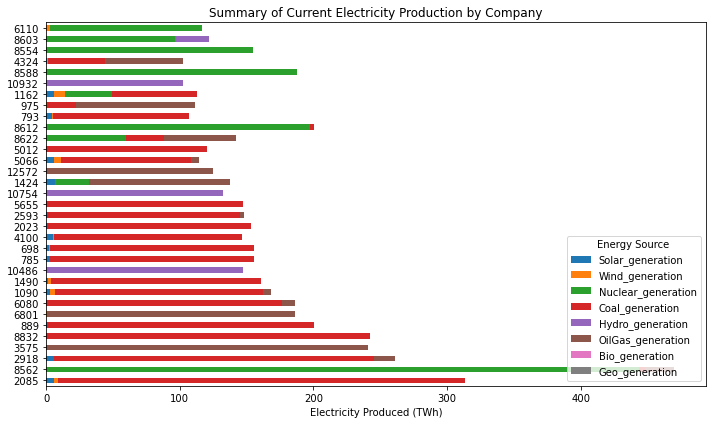

In [335]:
source_cols = [
    "Solar_generation", 
    "Wind_generation",
    "Nuclear_generation",
    "Coal_generation",
    "Hydro_generation",
    "OilGas_generation",
    "Bio_generation",
    "Geo_generation"
]

# Convert from MWh to TWh

# (Optional) Compute total in TWh if you haven't already
df_merged_sorted["total_estimated_generation"] = df_merged_sorted[source_cols].sum(axis=1)

# (Optional) Filter out rows with < 150 TWh, for example:
df_merged_sorted = df_merged_sorted[df_merged_sorted["total_estimated_generation"] >= 100]

import matplotlib.pyplot as plt

# Set the index to the company/owner name
df_merged_sorted_ = df_merged_sorted.set_index("Owner")

# Subset only the generation columns you want to stack
plot_cols = [
    "Solar_generation",
    "Wind_generation",
    "Nuclear_generation",
    "Coal_generation",
    "Hydro_generation",
    "OilGas_generation",
    "Bio_generation",
    "Geo_generation"
]

df_to_plot = df_merged_sorted[plot_cols].iloc[1:]

# Create a horizontal stacked bar chart using the sliced DataFrame
ax = df_to_plot.plot(
    kind="barh",    # horizontal bars
    stacked=True,
    figsize=(10, 6) # width x height in inches
)

# Label the axes
ax.set_xlabel("Electricity Produced (TWh)")
#ax.set_ylabel("")  # Remove the y-label if you want the companies to be clear on the axis
ax.set_title("Summary of Current Electricity Production by Company")

# Add a legend title or adjust location
ax.legend(title="Energy Source", loc="lower right")

plt.tight_layout()
plt.show()


In [1]:
capacity_sums = df_merged_sorted[capacity_cols].sum()

axx = capacity_sums.plot(kind="bar", figsize=(8, 5))

axx.set_title("Total Capacity by Technology")
axx.set_xlabel("Technology")
axx.set_ylabel("Capacity (MW)")  # or whatever unit your data is in

plt.tight_layout()
plt.savefig('totalcap.png',dpi=300)

NameError: name 'df_merged_sorted' is not defined